In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve, \
    precision_recall_curve, confusion_matrix

In [37]:
train_df = pd.read_csv('../dataset/input/embeddings_train.csv')
test_df = pd.read_csv('../dataset/input/embeddings_test.csv')

train_values = train_df.embedding.apply(eval).apply(np.array)
test_values = test_df.embedding.apply(eval).apply(np.array)

X_train = list(train_values)
y_train = train_df['is_phishing']
X_test = list(test_values)
y_test = test_df['is_phishing']

In [38]:
# Train a random forest classifier on the training set
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
# Make predictions on the test set
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

In [40]:
# Evaluate the performance of the classifier using various metrics
report = classification_report(y_test, preds, digits=4)
accuracy = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds)
roc_auc = roc_auc_score(y_test, probas[:, 1])

print("Classification Report:\n", report)
print("Accuracy: {:.5f}".format(accuracy))
print("F1 Score: {:.5f}".format(f1))
print("ROC AUC Score: {:.5f}".format(roc_auc))

Classification Report:
               precision    recall  f1-score   support

       False     0.9803    1.0000    0.9900       497
        True     1.0000    0.9029    0.9490       103

    accuracy                         0.9833       600
   macro avg     0.9901    0.9515    0.9695       600
weighted avg     0.9837    0.9833    0.9830       600

Accuracy: 0.98333
F1 Score: 0.94898
ROC AUC Score: 0.99986


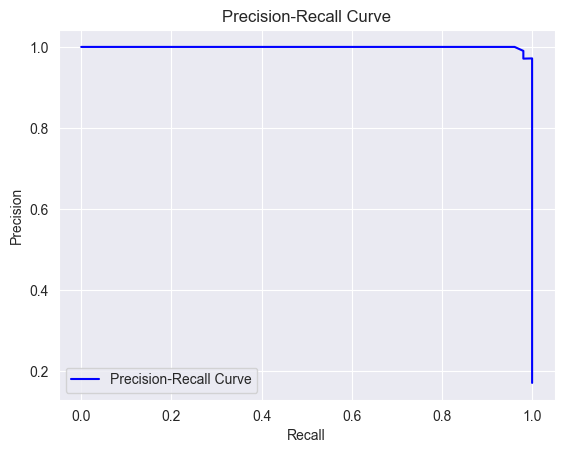

In [41]:
# Compute precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probas[:, 1])

# Plot the precision-recall curve
plt.plot(recall, precision, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [42]:
# Compute the false positive rate and true positive rate for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc = roc_auc_score(y_test, probas[:, 1])

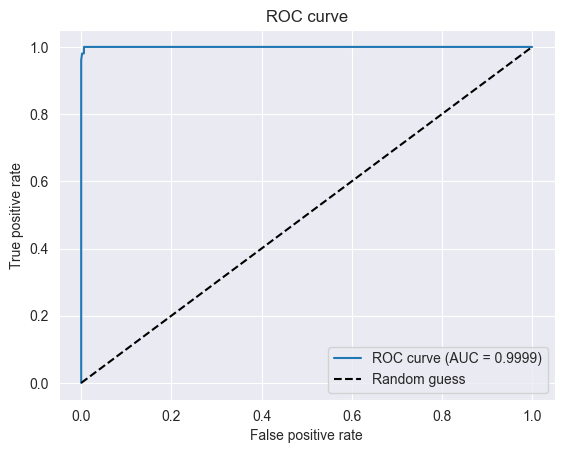

In [43]:
# Plot the ROC curve
plt.plot(fpr, tpr, linestyle='-', label='ROC curve (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

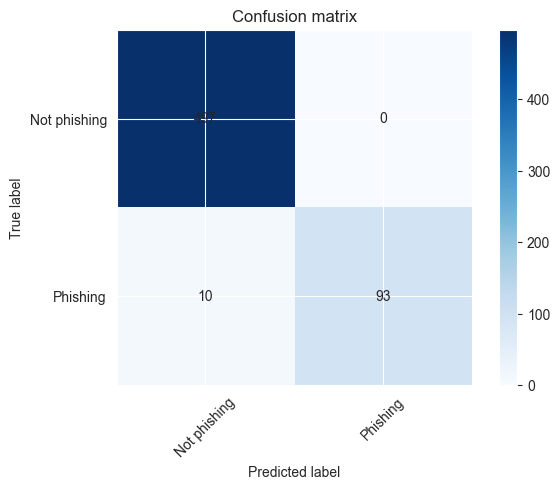

In [44]:
# Compute and plot confusion matrix
cm = confusion_matrix(y_test, preds)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not phishing', 'Phishing'], rotation=45)
plt.yticks(tick_marks, ['Not phishing', 'Phishing'])
plt.tight_layout()
plt.xlabel('Predicted label')
plt.ylabel('True label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.show()